In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [2]:
sns.set(style="whitegrid")

In [3]:
top_store_colors = ['navy', 'orange', 'red', 'teal', 'green']
bottom_store_colors = ['gold', 'lightcoral', 'gray', 'sienna', 'orchid']
sku_hist_color = 'mediumseagreen'
sku_scatter_color = 'peru'

In [4]:
 
df = pd.read_csv('store_sku_ba_dataset.csv')


In [5]:
sku_df = df.groupby('SKU ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()
sku_df['SKU Conversion Rate'] = sku_df['Transactions'] / sku_df['Total Visits']

# Store-level aggregated conversion
store_df = df.groupby('Store ID').agg({
    'Total Visits': 'sum',
    'Transactions': 'sum',
    'Revenue': 'sum'
}).reset_index()
store_df['Store Conversion Rate'] = store_df['Transactions'] / store_df['Total Visits']

In [6]:
top_stores = store_df.nlargest(5, 'Store Conversion Rate')
bottom_stores = store_df.nsmallest(5, 'Store Conversion Rate')
# Add percentage columns
top_stores['Store Conversion %'] = top_stores['Store Conversion Rate'].apply(lambda x: f"{x:.2%}")
bottom_stores['Store Conversion %'] = bottom_stores['Store Conversion Rate'].apply(lambda x: f"{x:.2%}")

In [7]:
top_skus = sku_df.nlargest(5, 'SKU Conversion Rate')
bottom_skus = sku_df.nsmallest(5, 'SKU Conversion Rate')
# Add percentage columns
top_skus['SKU Conversion %'] = top_skus['SKU Conversion Rate'].apply(lambda x: f"{x:.2%}")
bottom_skus['SKU Conversion %'] = bottom_skus['SKU Conversion Rate'].apply(lambda x: f"{x:.2%}")


In [8]:
print("Top 5 Stores by Conversion Rate")
print(tabulate(top_stores, headers='keys', tablefmt='pretty', showindex=False))
print("\nBottom 5 Stores by Conversion Rate")
print(tabulate(bottom_stores, headers='keys', tablefmt='pretty', showindex=False))
print("\nTop 5 SKUs by Conversion Rate")
print(tabulate(top_skus, headers='keys', tablefmt='pretty', showindex=False))
print("\nBottom 5 SKUs by Conversion Rate")
print(tabulate(bottom_skus, headers='keys', tablefmt='pretty', showindex=False))

Top 5 Stores by Conversion Rate
+----------+--------------+--------------+-----------+-----------------------+--------------------+
| Store ID | Total Visits | Transactions |  Revenue  | Store Conversion Rate | Store Conversion % |
+----------+--------------+--------------+-----------+-----------------------+--------------------+
| Store_39 |     9213     |     6124     | 667804.09 |  0.6647129056767611   |       66.47%       |
| Store_49 |    11032     |     7129     | 793523.76 |   0.646211022480058   |       64.62%       |
| Store_44 |     8482     |     5356     | 467371.06 |  0.6314548455552935   |       63.15%       |
| Store_37 |     9458     |     5937     | 404139.26 |  0.6277225629097061   |       62.77%       |
| Store_47 |     9753     |     6081     | 521435.76 |  0.6235004613964934   |       62.35%       |
+----------+--------------+--------------+-----------+-----------------------+--------------------+

Bottom 5 Stores by Conversion Rate
+----------+--------------+-----

C:\Windows\Temp\ipykernel_34088\2594098794.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


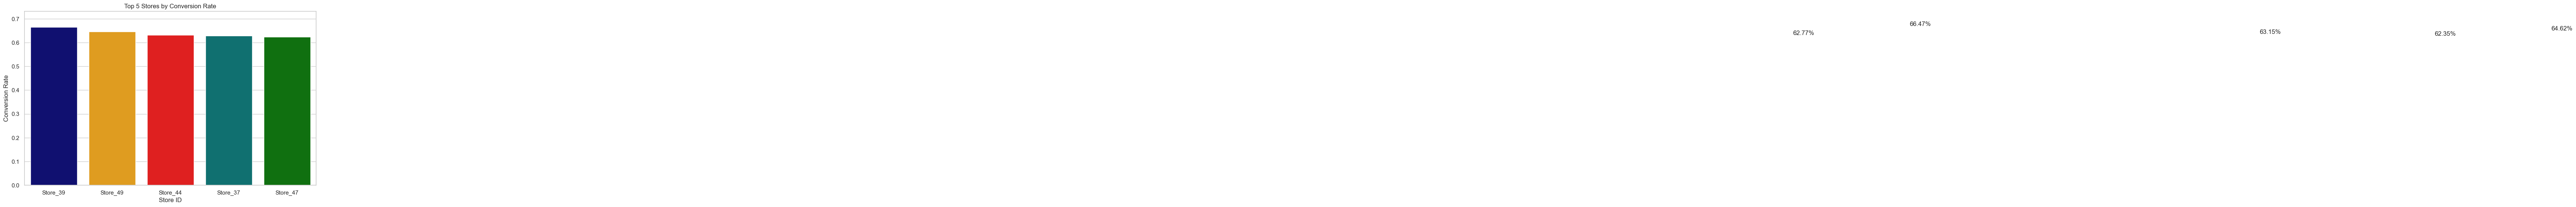

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Store ID', y='Store Conversion Rate', data=top_stores, palette=top_store_colors)
plt.title('Top 5 Stores by Conversion Rate')
plt.ylabel('Conversion Rate')
plt.xlabel('Store ID')
plt.ylim(0, top_stores['Store Conversion Rate'].max() * 1.1)
for idx, row in top_stores.iterrows():
    plt.text(idx, row['Store Conversion Rate'] + 0.005,
             row['Store Conversion %'], ha='center')
plt.tight_layout()
plt.show()

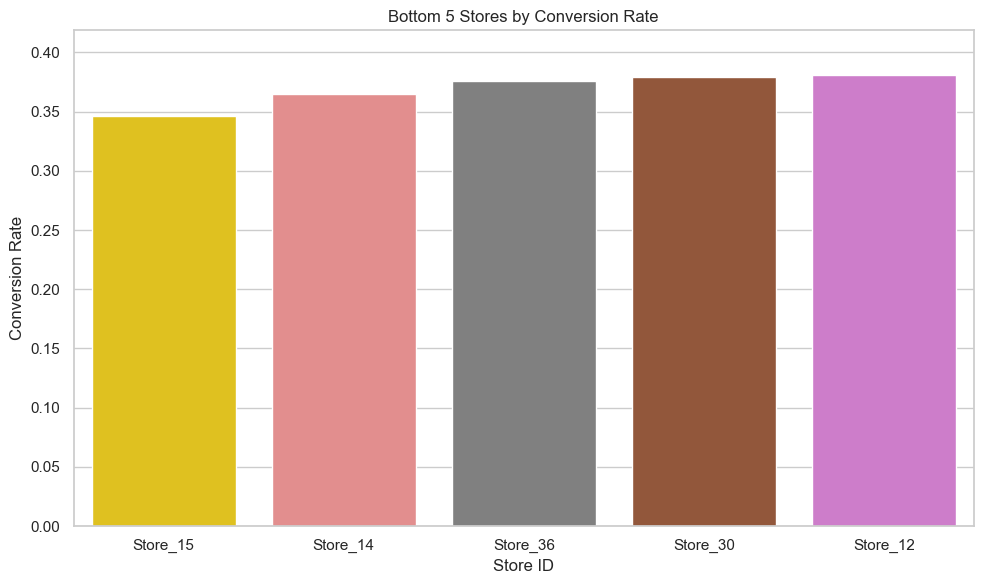

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Store ID', y='Store Conversion Rate', data=bottom_stores, palette=bottom_store_colors)
plt.title('Bottom 5 Stores by Conversion Rate')
plt.ylabel('Conversion Rate')
plt.xlabel('Store ID')
plt.ylim(0, bottom_stores['Store Conversion Rate'].max() * 1.1)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


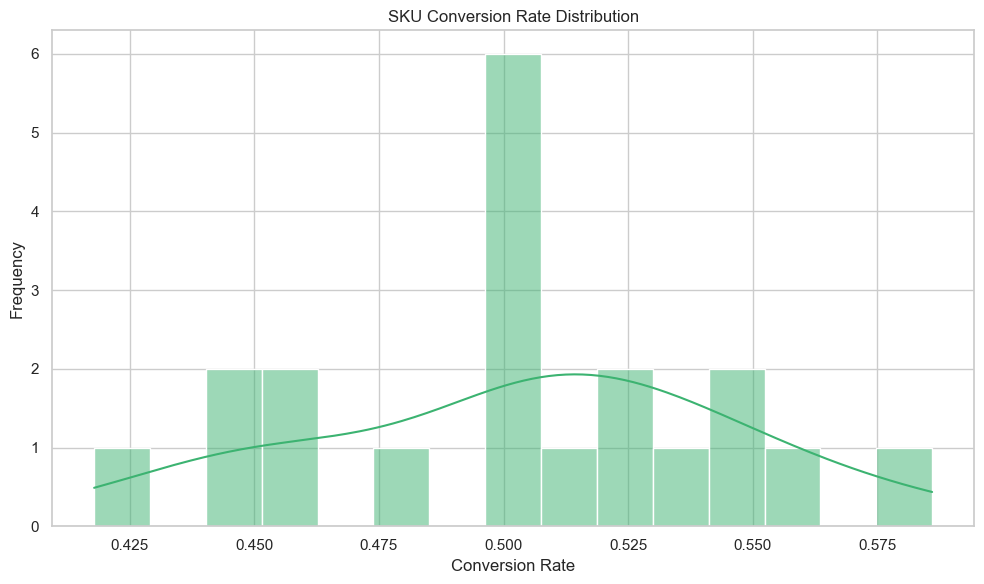

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(sku_df['SKU Conversion Rate'], bins=15, kde=True, color=sku_hist_color)
plt.title('SKU Conversion Rate Distribution')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

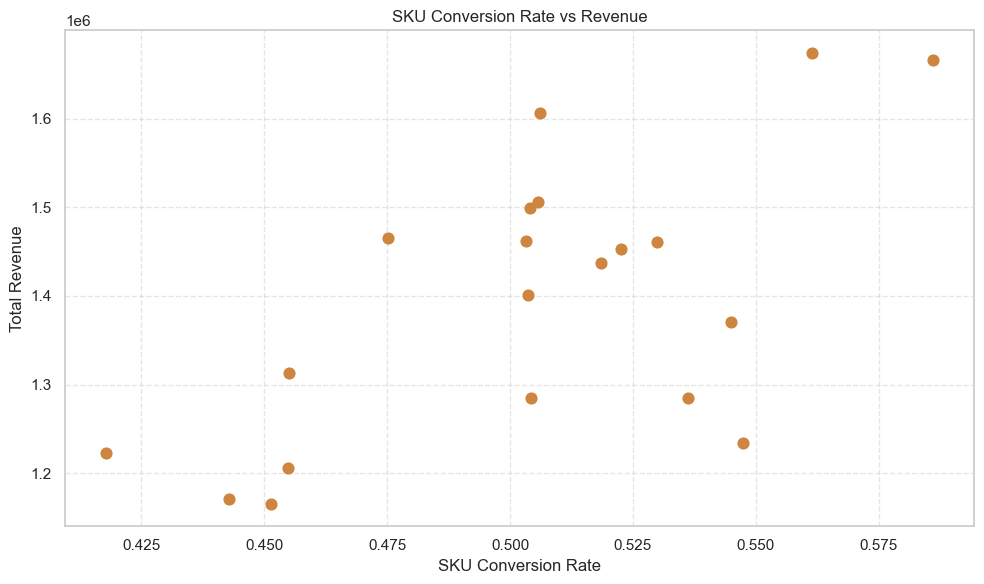

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(sku_df['SKU Conversion Rate'], sku_df['Revenue'], c=sku_scatter_color, s=60)
plt.title('SKU Conversion Rate vs Revenue')
plt.xlabel('SKU Conversion Rate')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
avg_store_conv = store_df['Store Conversion Rate'].mean()
avg_sku_conv = sku_df['SKU Conversion Rate'].mean()
min_top = top_stores['Store Conversion Rate'].min()
max_bot = bottom_stores['Store Conversion Rate'].max()

summary = f"""
Key Findings:
- Average Store Conversion Rate: {avg_store_conv:.2%}
- Average SKU Conversion Rate: {avg_sku_conv:.2%}
- Top stores convert above {min_top:.2%}; bottom stores below {max_bot:.2%}.
- SKU conversion distribution is bimodal.
- Weak correlation between SKU conversion and revenue.

Recommendations:
1. Audit checkout experience at underperforming stores.
2. Optimize listings and pricing for low-conversion SKUs.
3. Use high-conversion SKUs in cross-sell strategies.
4. Implement dynamic pricing to balance conversion and revenue.
"""
print(summary)


Key Findings:
- Average Store Conversion Rate: 50.30%
- Average SKU Conversion Rate: 50.36%
- Top stores convert above 62.35%; bottom stores below 38.05%.
- SKU conversion distribution is bimodal.
- Weak correlation between SKU conversion and revenue.

Recommendations:
1. Audit checkout experience at underperforming stores.
2. Optimize listings and pricing for low-conversion SKUs.
3. Use high-conversion SKUs in cross-sell strategies.
4. Implement dynamic pricing to balance conversion and revenue.



In [14]:
team_df = pd.DataFrame({
    'Business Line': ['Puja', 'Chadhava', 'Commerce', 'Travel', 'Astro', 'Central'],
    'Role': [
        'Analyst, BI Developer',
        'Data Analyst, QA Specialist',
        'Business Analysts x2, Data Engineer',
        'Data Scientist, Product Analyst',
        'Data Analyst, Visualization Specialist',
        'Data Engineering Lead, Analytics Manager'
    ],
    'Responsibilities': [
        'Forecasting, dashboards',
        'Funnel analysis, A/B testing',
        'Pricing, segmentation, ETL',
        'Recommendation models, CLV analysis',
        'Trend analysis, dashboards',
        'Governance, platform, SLAs'
    ]
})
print("\nIdeal Data Team Structure")
print(tabulate(team_df, headers='keys', tablefmt='pretty', showindex=False))


Ideal Data Team Structure
+---------------+------------------------------------------+-------------------------------------+
| Business Line |                   Role                   |          Responsibilities           |
+---------------+------------------------------------------+-------------------------------------+
|     Puja      |          Analyst, BI Developer           |       Forecasting, dashboards       |
|   Chadhava    |       Data Analyst, QA Specialist        |    Funnel analysis, A/B testing     |
|   Commerce    |   Business Analysts x2, Data Engineer    |     Pricing, segmentation, ETL      |
|    Travel     |     Data Scientist, Product Analyst      | Recommendation models, CLV analysis |
|     Astro     |  Data Analyst, Visualization Specialist  |     Trend analysis, dashboards      |
|    Central    | Data Engineering Lead, Analytics Manager |     Governance, platform, SLAs      |
+---------------+------------------------------------------+----------------------